In [1]:
# this file finds historical savings and baseline and compare it to expected

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import pymssql
# import pyodbc  as pdc
import sqlalchemy as sa

import urllib.parse

import plotly.express as px

import re
import tqdm
import os


import warnings
warnings.filterwarnings('ignore')


server='40.123.229.239'
username='smartae'
password = os.getenv('SQL_PASSWORD')
database='master'
encoded_password = urllib.parse.quote_plus(password)

conn = pymssql.connect(server, username, password, "master")
cursor = conn.cursor(as_dict=True)


In [3]:
df=pd.read_csv('../SQLMasterMetaData2.csv').drop(['Unnamed: 0'],axis=1)
df[df['TABLE_NAME'].str.contains('R320')].TABLE_NAME.values

parameters={'run_sts1': 'R320_1_CH1_RUN_STS', 'vsd_freq': 'R320_2_CH1_VSD_OUTFREQ',
          'ch1_kw': 'R320_2_CH1_METER_TOTAL_ACTIVE_POWER','ch1_m_energy':'R320_2_CH1_METER_TOTAL_ACTIVE_ENERGY',
          'pp1': 'R320_1_PP1_FB', 'pp2': 'R320_1_PP2_FB', 'pp3': 'R320_1_PP3_FB', 'pp4': 'R320_1_PP4_FB',
          'pp5': 'R320_1_PP5_FB', 'pp6': 'R320_1_PP6_FB', 'pp7': 'R320_1_PP7_FB', 'pp8': 'R320_1_PP8_FB',
          'sup_temp': 'R320_2_CH1_SUP_WTRTEMP', 'ret_temp': 'R320_2_CH1_RET_WTRTEMP', 'ch4_total_kW': 'R320_2_CH4_METER_TOTAL_ACTIVE_POWER',
          'ch2_kW1': 'R320_2_CH2A_METER_Total_Active_power', 'ch2_kW2': 'R320_2_CH2B_METER_Total_Active_power',
          'ch3_kW1': 'R320_2_CH3A_METER_Total_Active_power', 'ch3_kW2': 'R320_2_CH3B_METER_Total_Active_power'}

ch_parms=list(parameters.values())
labels=list(parameters.keys())



In [5]:
ignored=[]
res=pd.DataFrame()
for i,point in enumerate(ch_parms[:]):
        
        # point=rtus[3]
        query1=f"""SELECT 
                Timestamp,[VALUE] as {labels[i]}
                FROM [niagara].[dbo].{point}
                where timestamp < '2023-09-01'"""
        # print(query1)
        # cursor.execute(query1)
        # tempdf=pd.DataFrame(cursor.fetchall())
        tempdf=pd.read_sql(query1,conn)
        if len(tempdf)<10000:
            print(point,'==> IGNORED!!!')
            ignored.append(point)
            continue
        tempdf=tempdf.groupby(pd.Grouper(key='Timestamp',freq='15min')).mean().round(2).dropna()
        res=res.join(tempdf,how='outer')

res


,run_sts1,vsd_freq,ch1_kw,ch1_m_energy,pp1,pp2,pp3,pp4,pp5,pp6,pp7,pp8,sup_temp,ret_temp,ch4_total_kW,ch2_kW1,ch2_kW2,ch3_kW1,ch3_kW2
Timestamp,,,,,,,,,,,,,,,,,,,
2019-09-17 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.33,NaN,NaN,NaN,NaN,NaN
2019-09-17 15:15:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.33,NaN,NaN,NaN,NaN,NaN
2019-09-17 15:30:00,1.0,137.3,NaN,NaN,100.0,100.00,100.00,100.00,100.00,0.11,0.59,100.00,5.56,10.22,NaN,NaN,NaN,NaN,NaN
2019-09-17 15:45:00,1.0,137.3,0.14,411.90,100.0,100.00,100.00,100.00,100.00,0.10,0.60,100.00,5.61,10.28,0.12,0.68,0.66,0.68,0.00
2019-09-17 16:00:00,1.0,137.3,0.14,412.00,100.0,100.00,100.00,100.00,100.00,0.12,0.61,100.00,5.67,10.33,0.12,0.68,0.66,0.68,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 22:45:00,NaN,91.7,86.46,1288141.25,0.9,79.69,79.63,79.65,79.79,79.62,79.64,0.84,7.11,11.86,86.65,0.66,0.65,0.66,0.64
2023-08-31 23:00:00,NaN,99.3,94.22,1288163.75,0.9,77.66,77.61,77.60,77.76,77.59,77.62,0.84,7.01,12.03,88.90,0.66,0.65,0.67,0.64
2023-08-31 23:15:00,NaN,94.5,85.94,1288187.00,0.9,74.64,74.58,73.55,74.74,74.54,74.59,0.84,7.06,11.99,88.00,0.67,0.65,0.67,0.64


In [6]:
# which method of approximation is the most accurate
d0=res.copy()

# # optimized temp 1 (ch1,4, RTU ML) 15 mins
# temp=pd.read_pickle('ambtemp.pkl')
# temp.index=pd.to_datetime(temp.index)
# d1['amb_temp']=temp

# optimized temp 2 (weather.com data)
temp=pd.read_csv('amb_temp_hr.csv',index_col='Timestamp')
temp.index=pd.to_datetime(temp.index)
d1=d0.groupby(pd.Grouper(freq='1h')).mean().iloc[1:]
d1['amb_temp']=temp

# d1['run_sts_rounded']=d1['run_sts1'].round()
# d1['run_sts_p1rounded']=(d1['run_sts1']+.1).round()
d1=d1[~d1['ch1_kw'].isna()]


# for next time use d1.assign() 
# like https://www.kaggle.com/code/tetsutani/ps3e18-eda-ensemble-ml-pipeline-binarypredictict#Feature-Engineering

d1['ch2kw']=d1.ch2_kW1+d1.ch2_kW2
d1['ch3kw']=d1.ch3_kW1+d1.ch3_kW2
d1['ch1_run_sts']=d1.ch1_kw.apply(lambda x: 1 if x>10 else 0)

d1['ch2_run_sts']=d1.ch2kw.apply(lambda x: 1 if x>10 else 0)
d1['ch3_run_sts']=d1.ch3kw.apply(lambda x: 1 if x>10 else 0)
d1['ch4_run_sts']=d1.ch4_total_kW.apply(lambda x: 1 if x>10 else 0)
d1['NR_ch']=d1.ch1_run_sts+d1.ch2_run_sts+d1.ch3_run_sts+d1.ch4_run_sts
d1['fper_ch']=d1.apply(lambda x: 0 if x.NR_ch==0 else (x.pp1+x.pp2+x.pp3+x.pp4+x.pp5+x.pp6+x.pp7+x.pp8)/x.NR_ch,axis=1)

d1=d1[~d1.fper_ch.isna()]
d1['dT']=d1.apply(lambda x: max(0,x.ret_temp-x.sup_temp),axis=1)
runs=[i for i in d1.columns if 'run' in i.lower()]
runs=['run_sts_p1rounded', 'ch1_run_sts']
d1.head()



,run_sts1,vsd_freq,ch1_kw,ch1_m_energy,pp1,pp2,pp3,pp4,pp5,pp6,...,amb_temp,ch2kw,ch3kw,ch1_run_sts,ch2_run_sts,ch3_run_sts,ch4_run_sts,NR_ch,fper_ch,dT
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-09-17 16:00:00,1.0,138.775,0.1400,412.025,100.0,100.0,100.0,100.0,100.0,0.1100,...,38.0,1.3400,0.6800,0,0,0,0,0,0.0,4.7325
2019-09-17 17:00:00,1.0,130.625,0.1325,412.150,100.0,100.0,100.0,100.0,100.0,0.1050,...,36.0,1.3600,0.6900,0,0,0,0,0,0.0,4.3025
2019-09-17 18:00:00,1.0,128.450,0.1300,412.275,100.0,100.0,100.0,100.0,100.0,0.1150,...,36.0,1.3625,0.6925,0,0,0,0,0,0.0,4.1800
2019-09-17 19:00:00,NaN,123.825,0.1200,412.425,100.0,100.0,100.0,100.0,100.0,0.1175,...,35.0,1.3625,0.6925,0,0,0,0,0,0.0,3.9975
2019-09-17 20:00:00,NaN,115.000,0.1075,412.525,100.0,100.0,100.0,100.0,100.0,0.1100,...,35.0,1.3675,0.6950,0,0,0,0,0,0.0,3.6375


In [7]:
d0

,run_sts1,vsd_freq,ch1_kw,ch1_m_energy,pp1,pp2,pp3,pp4,pp5,pp6,pp7,pp8,sup_temp,ret_temp,ch4_total_kW,ch2_kW1,ch2_kW2,ch3_kW1,ch3_kW2
Timestamp,,,,,,,,,,,,,,,,,,,
2019-09-17 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.33,NaN,NaN,NaN,NaN,NaN
2019-09-17 15:15:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.33,NaN,NaN,NaN,NaN,NaN
2019-09-17 15:30:00,1.0,137.3,NaN,NaN,100.0,100.00,100.00,100.00,100.00,0.11,0.59,100.00,5.56,10.22,NaN,NaN,NaN,NaN,NaN
2019-09-17 15:45:00,1.0,137.3,0.14,411.90,100.0,100.00,100.00,100.00,100.00,0.10,0.60,100.00,5.61,10.28,0.12,0.68,0.66,0.68,0.00
2019-09-17 16:00:00,1.0,137.3,0.14,412.00,100.0,100.00,100.00,100.00,100.00,0.12,0.61,100.00,5.67,10.33,0.12,0.68,0.66,0.68,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 22:45:00,NaN,91.7,86.46,1288141.25,0.9,79.69,79.63,79.65,79.79,79.62,79.64,0.84,7.11,11.86,86.65,0.66,0.65,0.66,0.64
2023-08-31 23:00:00,NaN,99.3,94.22,1288163.75,0.9,77.66,77.61,77.60,77.76,77.59,77.62,0.84,7.01,12.03,88.90,0.66,0.65,0.67,0.64
2023-08-31 23:15:00,NaN,94.5,85.94,1288187.00,0.9,74.64,74.58,73.55,74.74,74.54,74.59,0.84,7.06,11.99,88.00,0.67,0.65,0.67,0.64


In [8]:
kwh=d0.ch1_kw.groupby(pd.Grouper(freq='h')).mean()
kwh

Timestamp
2019-09-17 15:00:00      0.1400
2019-09-17 16:00:00      0.1400
2019-09-17 17:00:00      0.1325
2019-09-17 18:00:00      0.1300
2019-09-17 19:00:00      0.1200
                         ...   
2023-08-31 19:00:00    136.7475
2023-08-31 20:00:00    108.0625
2023-08-31 21:00:00    100.1400
2023-08-31 22:00:00     93.1475
2023-08-31 23:00:00     88.2100
Freq: H, Name: ch1_kw, Length: 34665, dtype: float64

In [9]:
ff=pd.DataFrame(index=pd.date_range('2019-09-17 15:00:00','2023-08-31 23:00:00',freq='15min'))
ff1=ff.merge(d0,right_index=True,left_index=True,how='left')
ff2=ff1[['ch1_kw','ch1_m_energy']].groupby(pd.Grouper(freq='h')).agg({'ch1_kw':'mean','ch1_m_energy':'max'})
ff1.shape

(138657, 19)

In [10]:
ff2['ch1_c_energy']=ff2.ch1_kw.cumsum()+411.9
ff2

,ch1_kw,ch1_m_energy,ch1_c_energy
2019-09-17 15:00:00,0.1400,411.90,4.120400e+02
2019-09-17 16:00:00,0.1400,412.10,4.121800e+02
2019-09-17 17:00:00,0.1325,412.20,4.123125e+02
2019-09-17 18:00:00,0.1300,412.30,4.124425e+02
2019-09-17 19:00:00,0.1200,412.50,4.125625e+02
...,...,...,...
2023-08-31 19:00:00,136.7475,1287835.62,1.966985e+06
2023-08-31 20:00:00,108.0625,1287947.00,1.967093e+06
2023-08-31 21:00:00,100.1400,1288047.62,1.967193e+06
2023-08-31 22:00:00,93.1475,1288141.25,1.967286e+06


In [11]:
px.line(ff2[['ch1_m_energy','ch1_c_energy']])
# px.line(ff2)

In [12]:
def max_min_diff(x):
    return x.max() - x.min()

ff3=ff2.groupby(pd.Grouper(freq='d')).agg({'ch1_kw':['mean','count'],'ch1_m_energy':max_min_diff,'ch1_c_energy':max_min_diff})
ff3.columns=['avg_kwh',	'count',	'm_day_cons',	'c_day_cons']
ff3
# ff2.groupby(pd.Grouper(freq='d')).agg({'ch1_kw':'count','ch1_kw':'mean','ch1_m_energy':max_min_diff,'ch1_c_energy':max_min_diff})

,avg_kwh,count,m_day_cons,c_day_cons
2019-09-17,0.119722,9,1.00,0.9375
2019-09-18,0.119583,24,2.70,2.7700
2019-09-19,49.915312,24,3769.10,1197.8625
2019-09-20,98.866042,24,23.00,2276.7675
2019-09-21,99.653750,24,23.00,2303.5225
...,...,...,...,...
2023-08-27,108.237292,24,2509.25,2511.5400
2023-08-28,139.918438,24,3268.62,3270.9825
2023-08-29,135.465625,24,3159.25,3155.8825
2023-08-30,134.948125,24,3150.00,3154.9300


(0.0, 4000.0)

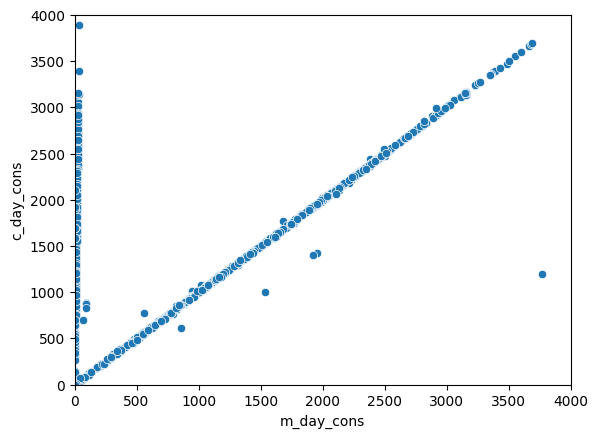

In [13]:
ax=sns.scatterplot(data=ff3,x='m_day_cons',y='c_day_cons')
ax.set_xlim([0,4000])
ax.set_ylim([0,4000])

In [14]:
ff3.groupby(pd.Grouper(freq='m')).sum().loc['2021'] # one chiller (CH1)

,avg_kwh,count,m_day_cons,c_day_cons
2021-01-31,72.760729,744,1714.80,1710.082500
2021-02-28,231.890556,666,5401.40,5393.880000
2021-03-31,32.411458,744,735.60,762.577500
2021-04-30,845.719583,720,19637.00,19650.247500
2021-05-31,3388.469340,744,78593.40,78604.139167
2021-06-30,2712.877083,720,62815.78,62873.705000
2021-07-31,3096.865313,744,71509.21,71625.765000
2021-08-31,3080.742479,672,68589.38,68644.877500
2021-09-30,2063.249688,720,47980.56,47995.715000
2021-10-31,1294.102188,744,30369.84,30309.200000


In [15]:
ff3.m_day_cons.max()

# look at 4 chillers, new -> ca
# find actual cooling load


111268.61